In [2]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd 
from scipy.spatial import ConvexHull
import math 
import time

In [4]:
df = pd.read_csv("sparse.csv", delimiter=',', skiprows=0, low_memory=False)
df

,S,r1,r2,r3,r4
0,s1,1,1,1,0
1,s2,1,1,0,0


In [23]:
dic={}
for s in range(len(df)):
    for r in range(4):
        if df.iloc[s,r+1] >0:
            dic[s+1,r+1]=df.iloc[s,r+1]

In [24]:
model = AbstractModel()
model.R=Param(mutable=True)
model.r = RangeSet(1,model.R)

model.S=Param(mutable=True)
model.s = RangeSet(1,model.S)
model.X = Var(model.s,model.r, within=Reals)
model.b=Param(model.s,mutable=True)
model.Y = Var(within=NonNegativeReals)

def Rule_C1A(model,s):
    return   sum(model.X[s,r] for r in model.r if (s,r) in dic) <=model.b[s]
model.C1A=Constraint(model.s,  rule=Rule_C1A)

model.obj1 = Objective(expr=model.Y, sense=minimize)
opt = SolverFactory('gurobi')

In [25]:
model.R=4
model.S=2
instance = model.create_instance()
instance.C1A.pprint()

C1A : Size=2, Index=s, Active=True
    Key : Lower : Body                     : Upper : Active
      1 :  -Inf : X[1,1] + X[1,2] + X[1,3] :  b[1] :   True
      2 :  -Inf :          X[2,1] + X[2,2] :  b[2] :   True


time= 0.5481870174407959
OF=  0.5146882670503339
The solver returned a status of:ok
this is feasible and optimal
Xup=  0.35711341304200706
Xdn=  0.614457546567174
Ydn=  0.4042823846228285
Yup=  0.6616265181479954


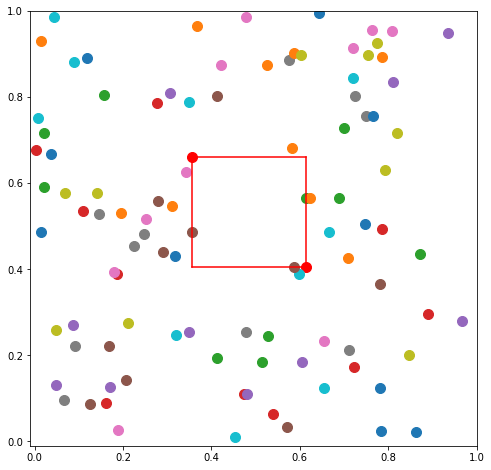

In [88]:
model.N=100

start = time.time()
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
end = time.time()
print('time=', end - start)

print('OF= ',value(instance.obj1))
print ("The solver returned a status of:"+str(results.solver.status))
from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is feasible and optimal")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     print (str(results.solver))
print('Xup= ',value(instance.xup))
print('Xdn= ',value(instance.xdn))
print('Ydn= ',value(instance.ydn))
print('Yup= ',value(instance.yup))

plt.figure(figsize=(8,8))
plt.scatter(value(instance.xup) , value(instance.yup) , s=100, c='r' )
plt.scatter(value(instance.xdn) , value(instance.ydn) , s=100, c='r' )
for i in instance.i:
    plt.scatter(value(instance.x[i]) , value(instance.y[i]) , s=100 )
    #plt.text(value(instance.x[i]) , value(instance.y[i]) , s=str(i) , c='k' )
    
    #print(i, value(instance.U[i]),1-value(instance.u[i]),value(instance.P[i]),1-value(instance.p[i]) )
plt.xlim(-0.01,1)
plt.ylim(-0.01,1)
plt.plot( (value(instance.xdn),value(instance.xup) ), (value(instance.yup),value(instance.yup)) , c='r')
plt.plot( (value(instance.xdn),value(instance.xup) ), (value(instance.ydn),value(instance.ydn)) , c='r')
plt.plot( (value(instance.xdn),value(instance.xdn) ), (value(instance.ydn),value(instance.yup)) , c='r')
plt.plot( (value(instance.xup),value(instance.xup) ), (value(instance.ydn),value(instance.yup)) , c='r')

OF=  0.7053904860971187
The solver returned a status of:ok
this is feasible and optimal
Xup=  0.5379935096078676
Xdn=  0.890688752656427
Ydn=  0.5437639241476604
Yup=  0.8964591671962198
OF=  0.5934600846333467
The solver returned a status of:ok
this is feasible and optimal
Xup=  0.0
Xdn=  0.2967300423166733
Ydn=  0.2808861025273516
Yup=  0.5776161448440249
OF=  0.5476023665960013
The solver returned a status of:ok
this is feasible and optimal
Xup=  0.4914084215870317
Xdn=  0.7652096048850323
Ydn=  0.42960273481712363
Yup=  0.7034039181151243
OF=  0.647161221736165
The solver returned a status of:ok
this is feasible and optimal
Xup=  0.6533640321805367
Xdn=  0.9769446430486192
Ydn=  0.5741049995629065
Yup=  0.8976856104309889
OF=  0.6920849941617964
The solver returned a status of:ok
this is feasible and optimal
Xup=  0.36210134442732
Xdn=  0.7081438415082182
Ydn=  0.5689833418478478
Yup=  0.915025838928746
OF=  0.5473608976086639
The solver returned a status of:ok
this is feasible and

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


OF=  0.5983116087739306
The solver returned a status of:ok
this is feasible and optimal
Xup=  0.7008441956130347
Xdn=  1.0
Ydn=  0.5983494223155499
Yup=  0.8975052267025152
OF=  0.6054768615927186
The solver returned a status of:ok
this is feasible and optimal
Xup=  0.06547015981662119
Xdn=  0.3682085906129805
Ydn=  0.12547385768664476
Yup=  0.4282122884830041
OF=  0.6019061529297989
The solver returned a status of:ok
this is feasible and optimal
Xup=  0.49094158475062577
Xdn=  0.7918946612155252
Ydn=  0.21054066707496855
Yup=  0.511493743539868
OF=  0.7884509521014649
The solver returned a status of:ok
this is feasible and optimal
Xup=  0.10386005412951427
Xdn=  0.4980855301802467
Ydn=  0.5036927175577808
Yup=  0.8979181936085132
OF=  0.6383777791258263
The solver returned a status of:ok
this is feasible and optimal
Xup=  0.4525442486024849
Xdn=  0.7717331381653981
Ydn=  0.6808111104370869
Yup=  1.0
OF=  0.6691296791562953
The solver returned a status of:ok
this is feasible and optima

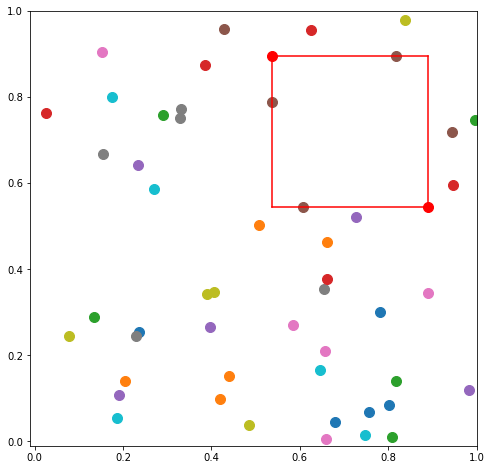

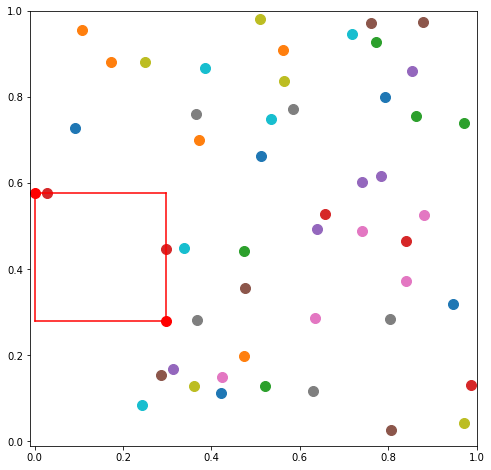

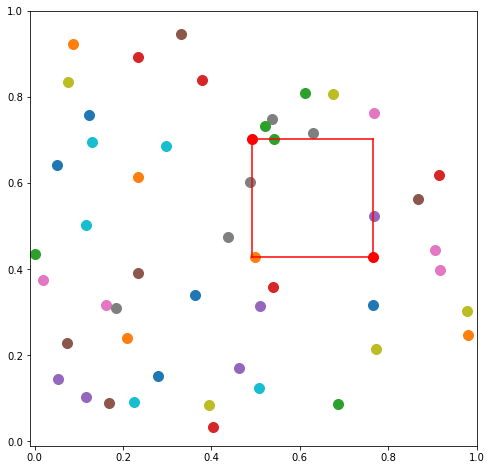

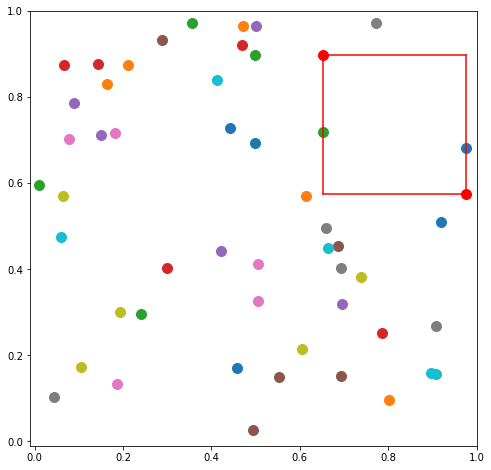

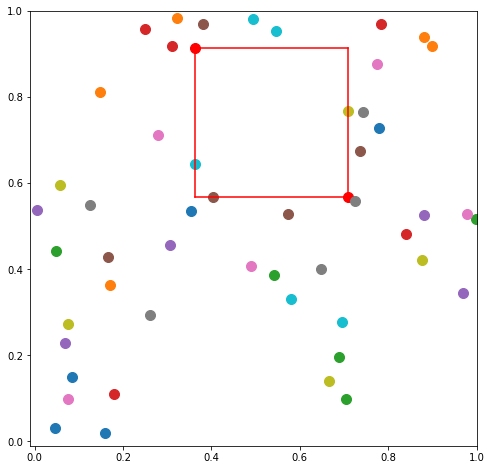

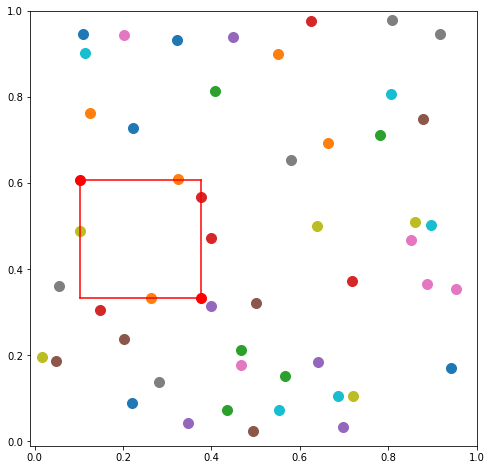

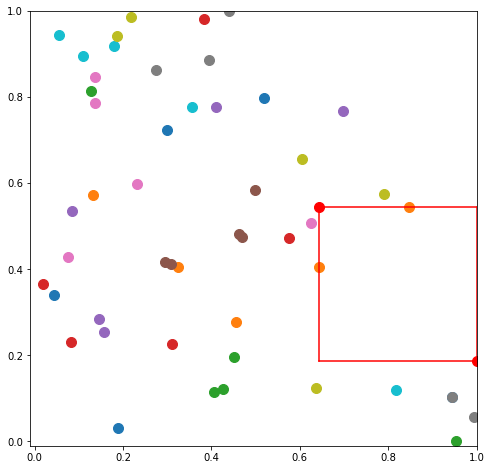

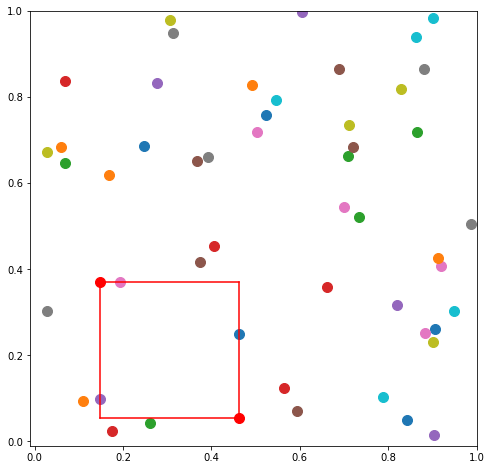

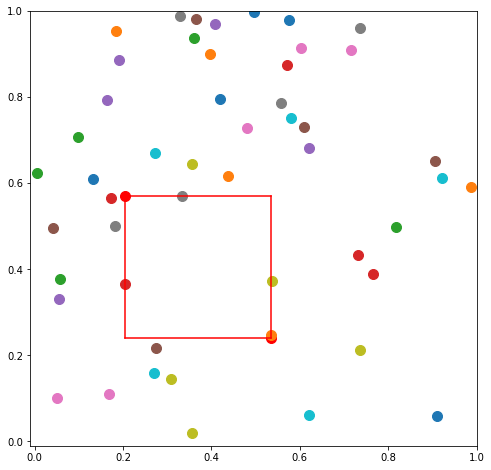

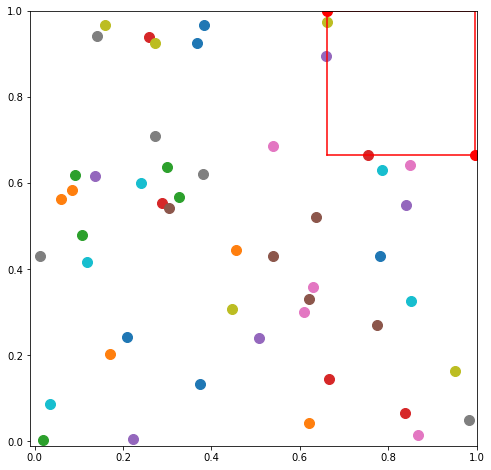

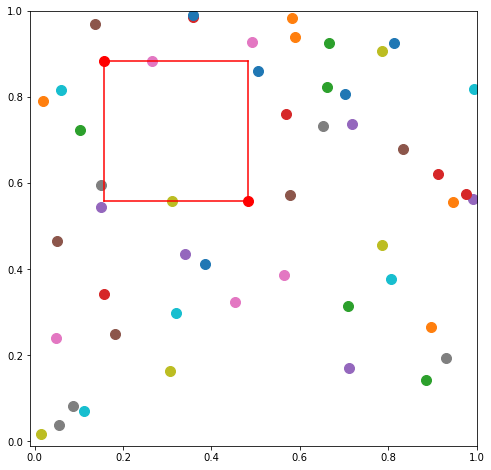

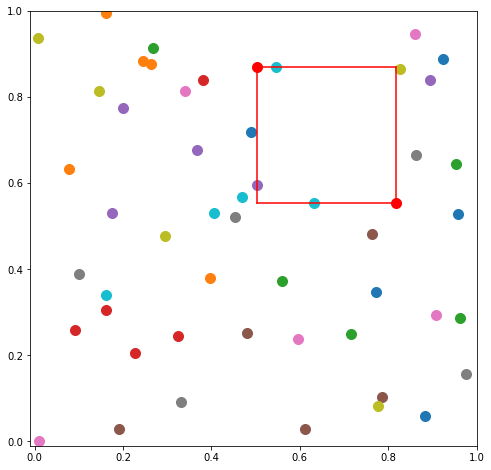

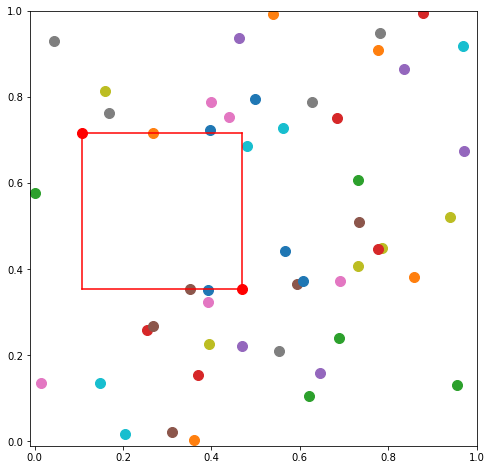

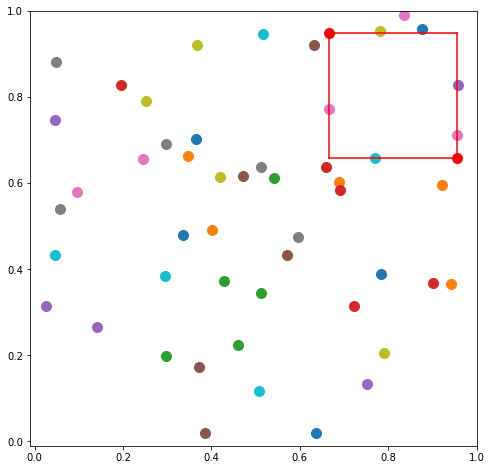

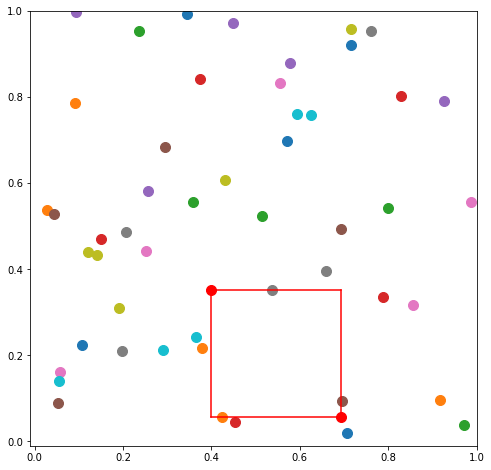

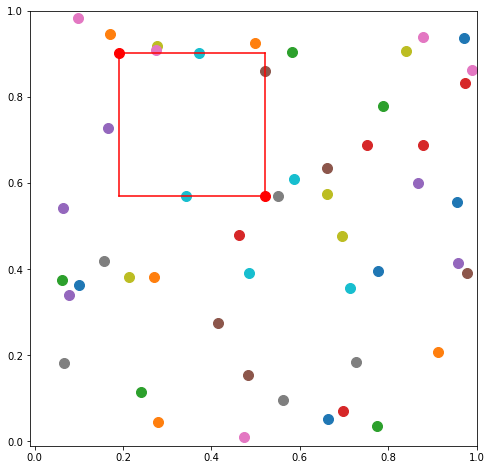

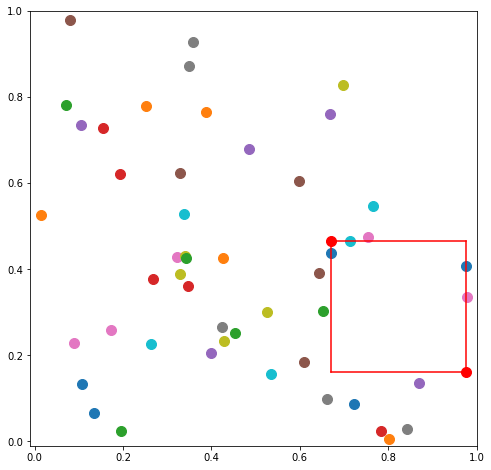

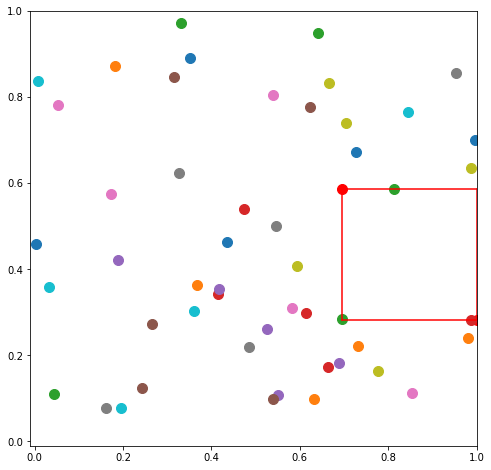

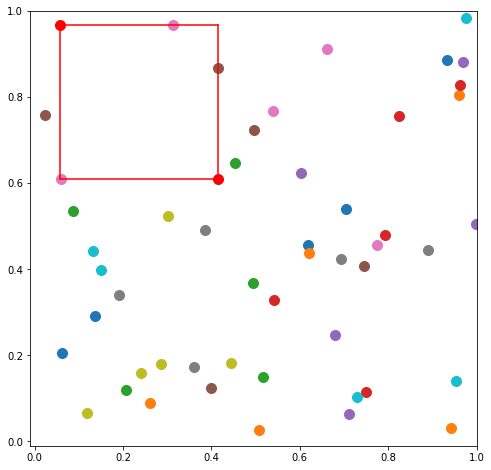

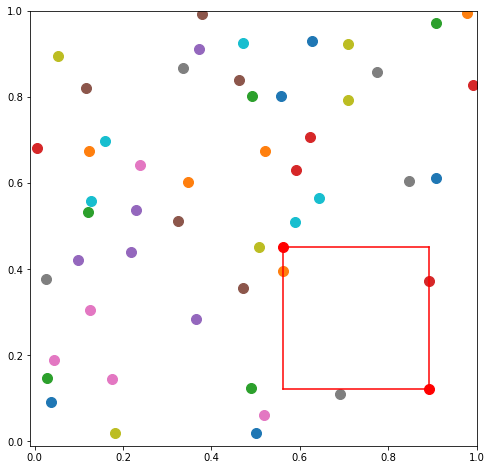

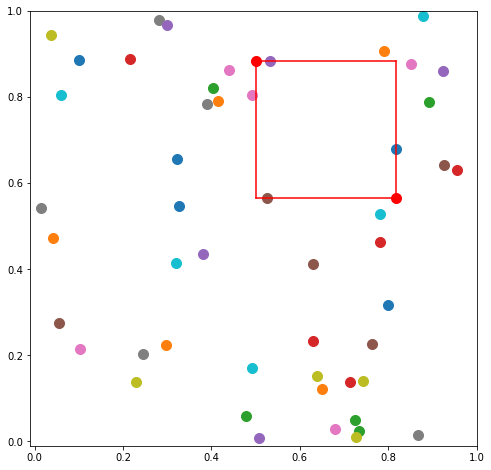

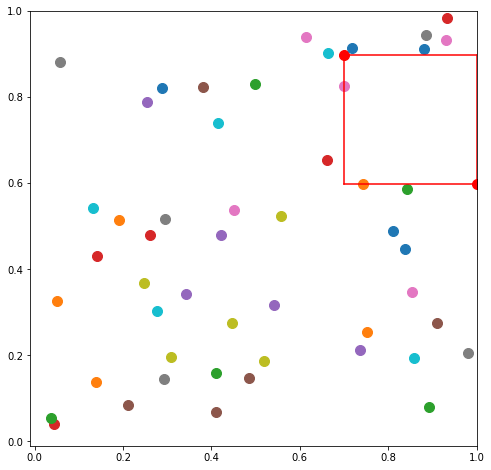

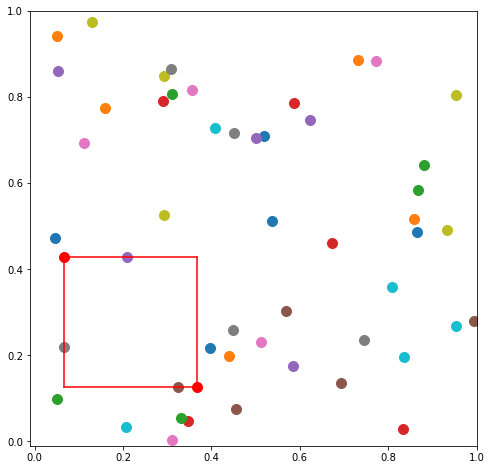

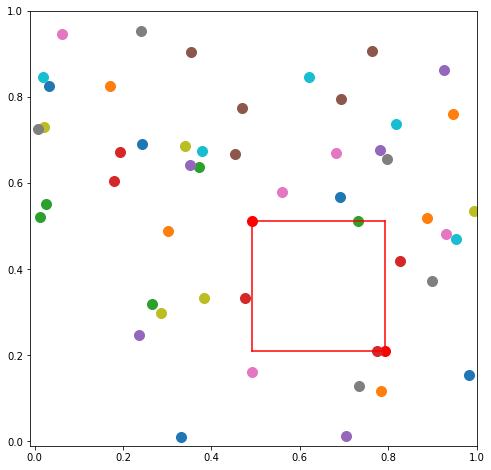

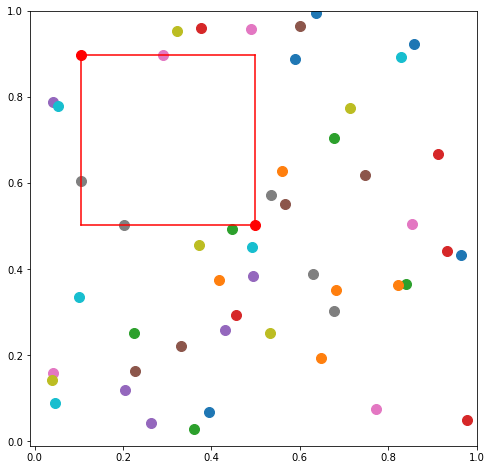

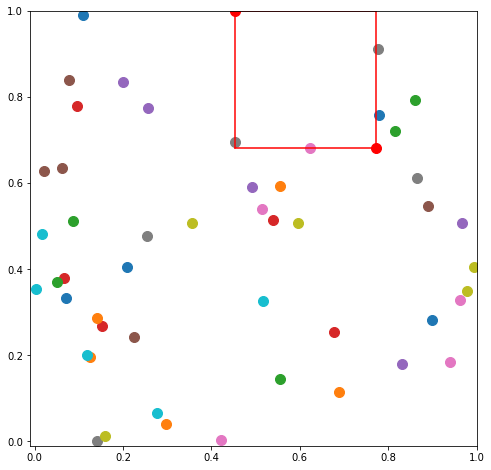

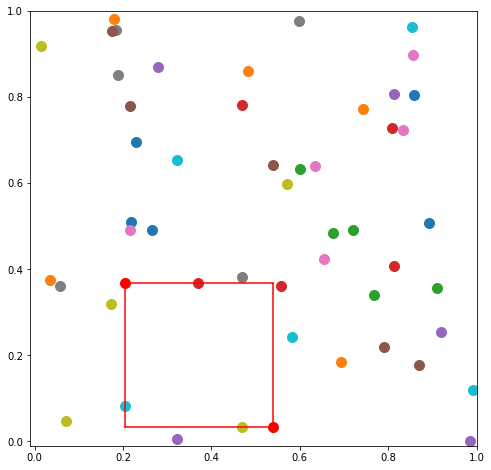

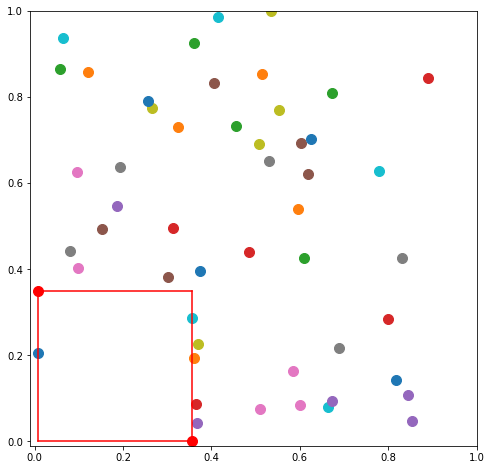

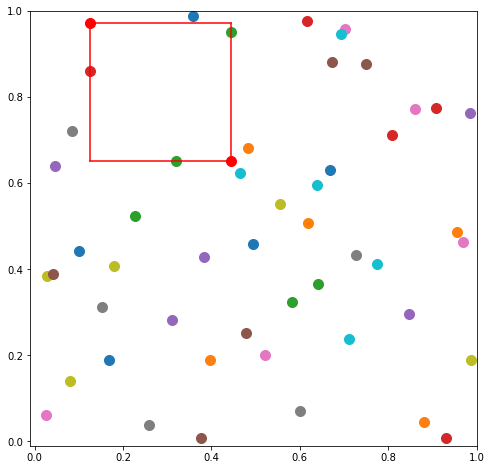

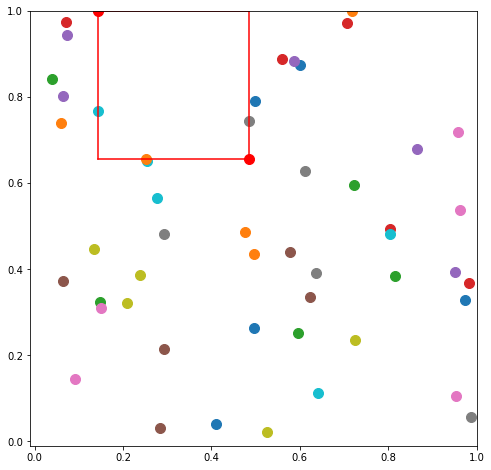

In [82]:
instance = model.create_instance()
for counter in range(30):
    for i in instance.i:
        instance.x[i]=np.random.uniform(0,1)
        instance.y[i]=np.random.uniform(0,1)
    results = opt.solve(instance) # solves and updates instance
    print('OF= ',value(instance.obj1))
    print ("The solver returned a status of:"+str(results.solver.status))
    from pyomo.opt import SolverStatus, TerminationCondition
    if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
         print ("this is feasible and optimal")
    elif results.solver.termination_condition == TerminationCondition.infeasible:
         print ("do something about it? or exit?")
    else:
         print (str(results.solver))
    print('Xup= ',value(instance.xup))
    print('Xdn= ',value(instance.xdn))
    print('Ydn= ',value(instance.ydn))
    print('Yup= ',value(instance.yup))

    plt.figure(figsize=(8,8))
    plt.scatter(value(instance.xup) , value(instance.yup) , s=100, c='r' )
    plt.scatter(value(instance.xdn) , value(instance.ydn) , s=100, c='r' )
    for i in instance.i:
        plt.scatter(value(instance.x[i]) , value(instance.y[i]) , s=100 )
        #plt.text(value(instance.x[i]) , value(instance.y[i]) , s=str(i) , c='k' )

        #print(i, value(instance.U[i]),1-value(instance.u[i]),value(instance.P[i]),1-value(instance.p[i]) )
    plt.xlim(-0.01,1)
    plt.ylim(-0.01,1)
    plt.plot( (value(instance.xdn),value(instance.xup) ), (value(instance.yup),value(instance.yup)) , c='r')
    plt.plot( (value(instance.xdn),value(instance.xup) ), (value(instance.ydn),value(instance.ydn)) , c='r')
    plt.plot( (value(instance.xdn),value(instance.xdn) ), (value(instance.ydn),value(instance.yup)) , c='r')
    plt.plot( (value(instance.xup),value(instance.xup) ), (value(instance.ydn),value(instance.yup)) , c='r')
    plt.savefig('Empty Box'+str(counter)+ '.png', format='png', bbox_inches='tight', dpi=400)

    